In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
data = pd.read_csv('/content/drive/MyDrive/files/benin-malanville.csv')
data2 = pd.read_csv('/content/drive/MyDrive/files/sierraleone-bumbuna.csv')
data3 = pd.read_csv('/content/drive/MyDrive/files/togo-dapaong_qc.csv')

In [36]:
# List of column names to analyze
columns = ['RH', 'WS', 'GHI', 'DNI', 'DHI']  # Replace with your column names

# Define a function to compute statistics for a given dataset
def compute_statistics(data, dataset_name):
    statistics = {}
    for col in columns:
        if col in data.columns:
            statistics[col] = {
                'Mean': data[col].mean(),
                'Median': data[col].median(),
                'Variance': data[col].var(),
                'Skewness': data[col].skew(),
                'Kurtosis': data[col].kurt()
            }
    stats_df = pd.DataFrame(statistics).transpose()
    print(f"\nSummary Statistics for {dataset_name} Dataset:\n", stats_df)

# Apply the function to each dataset
compute_statistics(data, "Benin")          # Replace 'data' with your Benin dataset
compute_statistics(data3, "Togo")         # Replace 'data3' with your Togo dataset
compute_statistics(data2, "Sierra Leone") # Replace 'data2' with your Sierra Leone dataset



Summary Statistics for Benin Dataset:
            Mean  Median       Variance  Skewness  Kurtosis
RH    54.487969    55.1     788.097191 -0.026653 -1.298555
WS     2.121113     1.9       2.571103  0.868406  1.579008
GHI  240.559452     1.8  109647.955903  1.028446 -0.460184
DNI  167.187516    -0.1   68492.386135  1.290260  0.172956
DHI  115.358961     1.6   25182.856923  1.210406  0.498993

Summary Statistics for Togo Dataset:
            Mean  Median       Variance  Skewness  Kurtosis
RH    55.013160    59.3     828.215434 -0.152969 -1.367544
WS     2.368093     2.2       2.139397  0.690870  1.199291
GHI  230.555040     2.1  104027.114611  1.107511 -0.222829
DNI  151.258469     0.0   62979.396604  1.459863  0.707086
DHI  116.444352     2.5   24498.733805  1.198758  0.413656

Summary Statistics for Sierra Leone Dataset:
            Mean  Median      Variance  Skewness  Kurtosis
RH    79.448857    85.4    421.102189 -1.115544  0.548357
WS     1.146113     0.8      1.535737  1.187762  2

In [37]:
def summarize_missing_values(dataset, file_name):
    missing_values = dataset.isnull().sum()
    missing_data = pd.DataFrame({
        'File': file_name,
        'Column': missing_values.index,
        'Missing Values Count': missing_values.values
    })
    # Filter out columns with no missing values
    missing_data = missing_data[missing_data['Missing Values Count'] > 0]
    return missing_data

# Summarize missing values for each dataset
missing_benin = summarize_missing_values(data, "benin-malanville.csv")
missing_sierraleone = summarize_missing_values(data2, "sierraleone-bumbuna.csv")
missing_togo = summarize_missing_values(data3, "togo-dapaong_qc.csv")

# Combine all summaries into a single DataFrame
combined_missing_data = pd.concat([missing_benin, missing_sierraleone, missing_togo], ignore_index=True)

# Display the combined missing values summary
print("\nColumns with Missing Values (File & Count):\n")
print(combined_missing_data[['File', 'Column', 'Missing Values Count']].to_string(index=False))



Columns with Missing Values (File & Count):

                   File   Column  Missing Values Count
   benin-malanville.csv Comments                525600
sierraleone-bumbuna.csv Comments                525600
    togo-dapaong_qc.csv Comments                525600


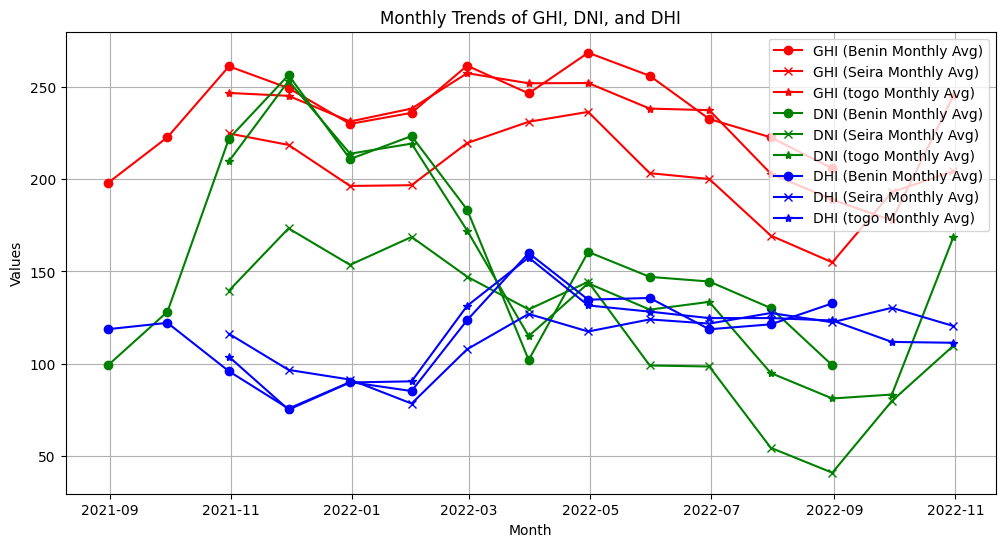

In [38]:

# Convert 'Timestamp' column to datetime format then Set the 'Timestamp' column as the index for easier resampling
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data.set_index('Timestamp', inplace=True)
data2['Timestamp'] = pd.to_datetime(data2['Timestamp'], errors='coerce')
data2.set_index('Timestamp', inplace=True)
data3['Timestamp'] = pd.to_datetime(data3['Timestamp'], errors='coerce')
data3.set_index('Timestamp', inplace=True)

# Plot Monthly Data
monthly_data = data.resample('ME').mean()  # Resample by month and calculate the mean for numeric columns
monthly_data2 = data2.resample('ME').mean()
monthly_data3 = data3.resample('ME').mean()

plt.figure(figsize=(12, 6))

plt.plot(monthly_data.index, monthly_data['GHI'], label='GHI (Benin Monthly Avg)', marker='o', color="red")
plt.plot(monthly_data2.index, monthly_data2['GHI'], label='GHI (Seira Monthly Avg)', marker='x', color="red")
plt.plot(monthly_data3.index, monthly_data3['GHI'], label='GHI (togo Monthly Avg)', marker='*', color="red")

plt.plot(monthly_data.index, monthly_data['DNI'], label='DNI (Benin Monthly Avg)', marker='o', color="green")
plt.plot(monthly_data2.index, monthly_data2['DNI'], label='DNI (Seira Monthly Avg)', marker='x', color="green")
plt.plot(monthly_data3.index, monthly_data3['DNI'], label='DNI (togo Monthly Avg)', marker='*', color="green")

plt.plot(monthly_data.index, monthly_data['DHI'], label='DHI (Benin Monthly Avg)', marker='o', color="blue")
plt.plot(monthly_data2.index, monthly_data2['DHI'], label='DHI (Seira Monthly Avg)', marker='x', color="blue")
plt.plot(monthly_data3.index, monthly_data3['DHI'], label='DHI (togo Monthly Avg)', marker='*', color="blue")

plt.title('Monthly Trends of GHI, DNI, and DHI')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

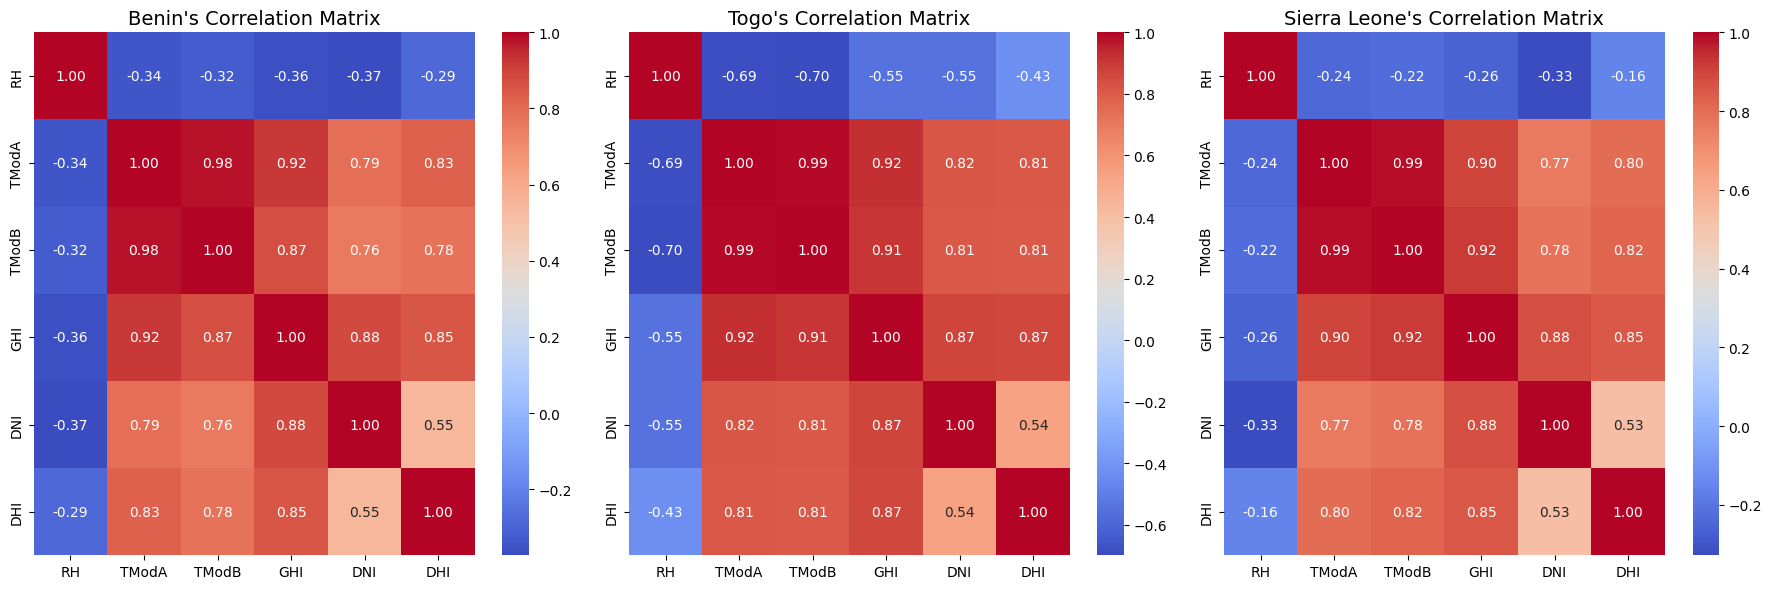

In [39]:
# @title Default title text
def correlation_plot(df, ax, name):
    # Compute correlation matrix for selected columns
    correlation_matrix = df[["RH", "TModA", 'TModB', 'GHI', 'DNI', 'DHI']].corr()

    # Plot the heatmap on the given axis (ax)
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
    ax.set_title(f"{name}'s Correlation Matrix", fontsize=14)

# Create a figure with 1 row and 3 columns for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Call the function for each dataset and pass the axis to plot on
correlation_plot(data, axes[0], "Benin")
correlation_plot(data2, axes[1], "Togo")
correlation_plot(data3, axes[2], "Sierra Leone")

# Adjust layout to avoid overlap of titles/labels
plt.tight_layout()
plt.show()


NameError: name 'average_speed' is not defined

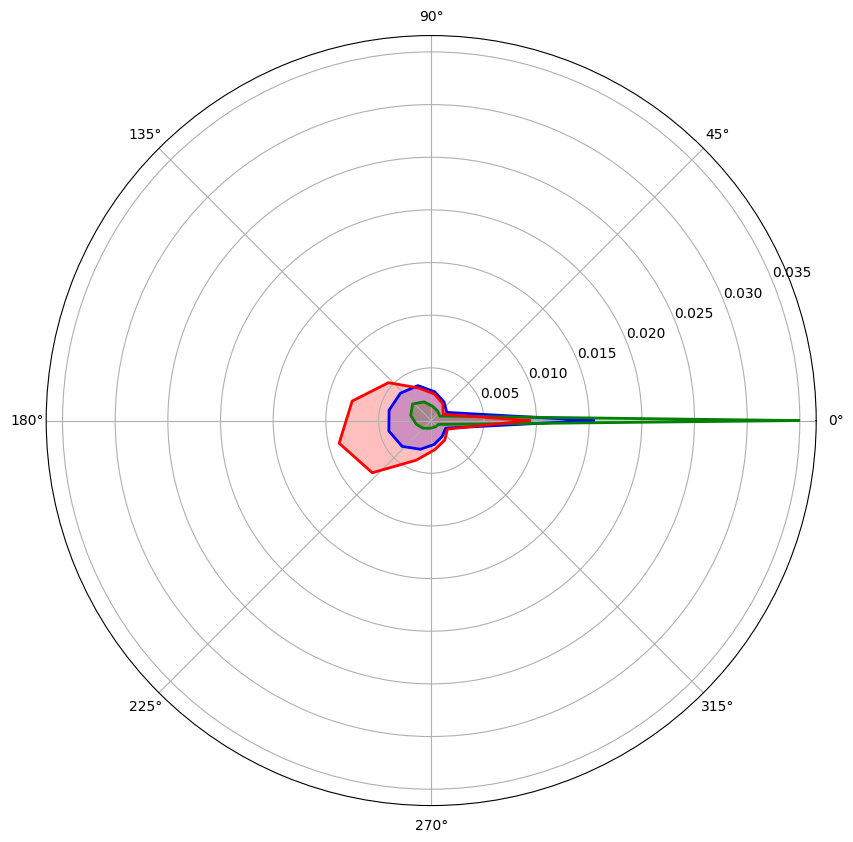

In [40]:
# Function to create radial bar plot for wind speed vs direction
def create_radial_plot(data, label, color):
    wind_bins = np.arange(0, 136, 10)
    wind_speed_bins = np.arange(0, data['WS'].max() + 1, 1)

    hist, xedges, yedges = np.histogram2d(data['WD'], data['WS'], bins=[wind_bins, wind_speed_bins])
    hist = hist / hist.sum()

    # Calculate average wind speed per direction bin
    average_speed = hist.mean(axis=1)

    # Create a radial bar plot
    angles = np.linspace(0, 2 * np.pi, len(average_speed), endpoint=False).tolist()
    average_speed = np.concatenate((average_speed, [average_speed[0]]))  # Close the loop
    angles += angles[:1]

    # Plotting
    ax.plot(angles, average_speed, label=label, color=color, linewidth=2)
    ax.fill(angles, average_speed, color=color, alpha=0.25)

# Create figure for radial plots
plt.figure(figsize=(10, 10))

# Create polar subplot
ax = plt.subplot(111, polar=True)

# Call the function for each dataset
create_radial_plot(data, "Benin", 'blue')
create_radial_plot(data2, "Sierra Leone", 'green')
create_radial_plot(data3, "Togo", 'red')

# Set direction labels
ax.set_xticks(np.linspace(0, 2 * np.pi, len(average_speed)-1, endpoint=False))  # Set direction labels
ax.set_xticklabels(['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'W', 'NW'])

# Set the title and legend
ax.set_title('Radial Bar Plot of Average Wind Speed for Benin, Sierra Leone, and Togo')
ax.legend()

# Display the plot
plt.show()


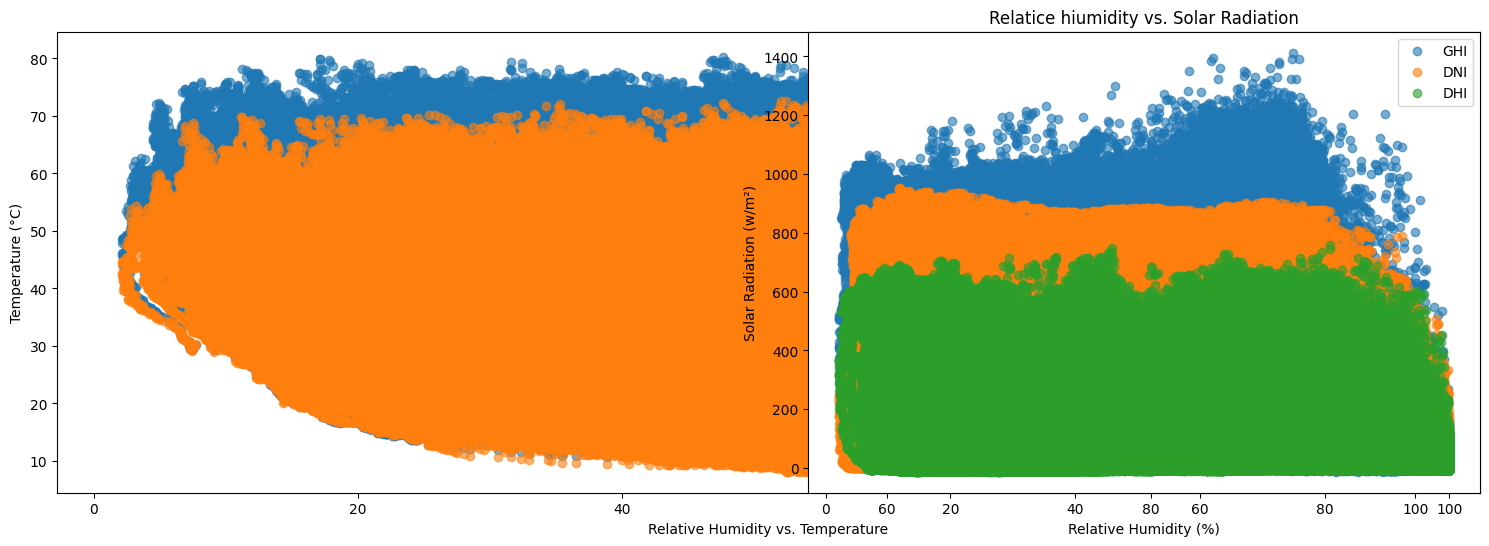

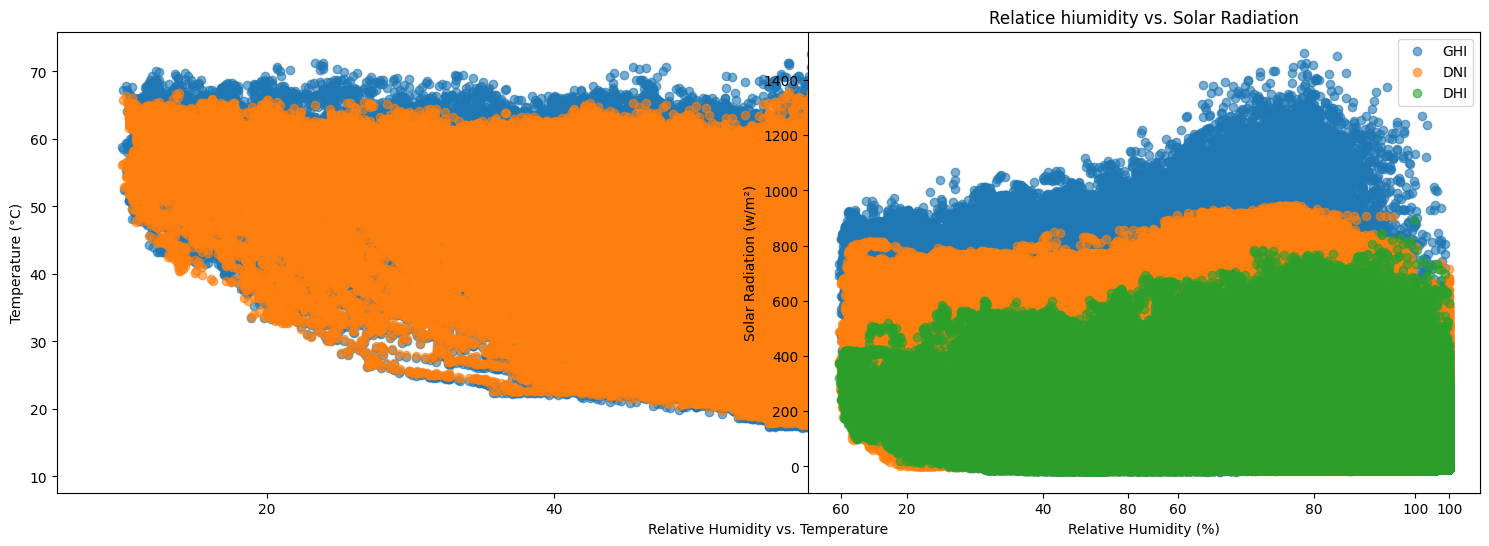

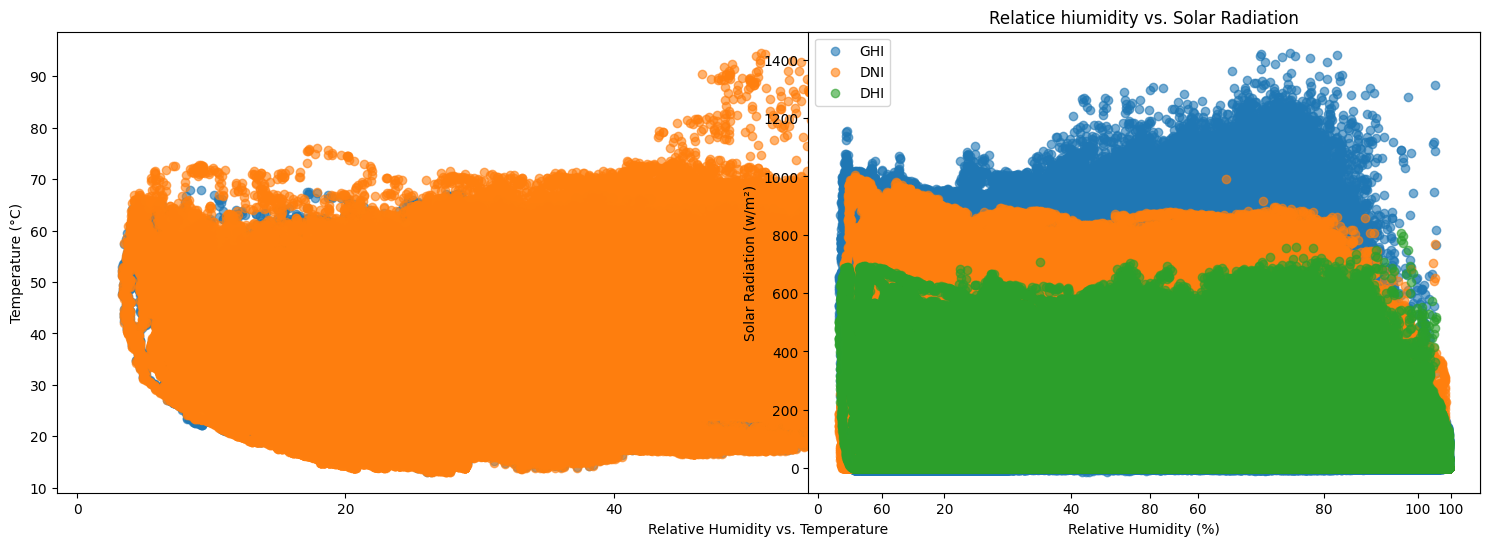

In [16]:
def temperature_analysis(df):
  plt.figure(figsize=(15,6))
  plt.scatter(data=df, x="RH", y='TModA', label='TModA', alpha=0.6)
  plt.scatter(data=df, x="RH", y='TModB', label='TModB', alpha=0.6)
  plt.xlabel('Relative Humidity vs. Temperature')
  plt.ylabel('Relative Humidity (%)')
  plt.ylabel("Temperature (°C)")
  plt.legend()

  plt.subplot(1,2,2)
  plt.scatter(data=df, x="RH", y='GHI', label='GHI', alpha=0.6)
  plt.scatter(data=df, x="RH", y='DNI', label='DNI', alpha=0.6)
  plt.scatter(data=df, x="RH", y='DHI', label='DHI', alpha=0.6)
  plt.title("Relatice hiumidity vs. Solar Radiation")
  plt.xlabel('Relative Humidity (%)')
  plt.ylabel('Solar Radiation (w/m²)')
  plt.legend()

  plt.tight_layout()
  return plt.show()

temperature_analysis(data)
temperature_analysis(data2)
temperature_analysis(data3)


'datetime' column missing in data. Attempting to create...
'datetime' column could not be created in data. Using index instead.
'datetime' column missing in data2. Attempting to create...
'datetime' column could not be created in data2. Using index instead.
'datetime' column missing in data3. Attempting to create...
'datetime' column could not be created in data3. Using index instead.


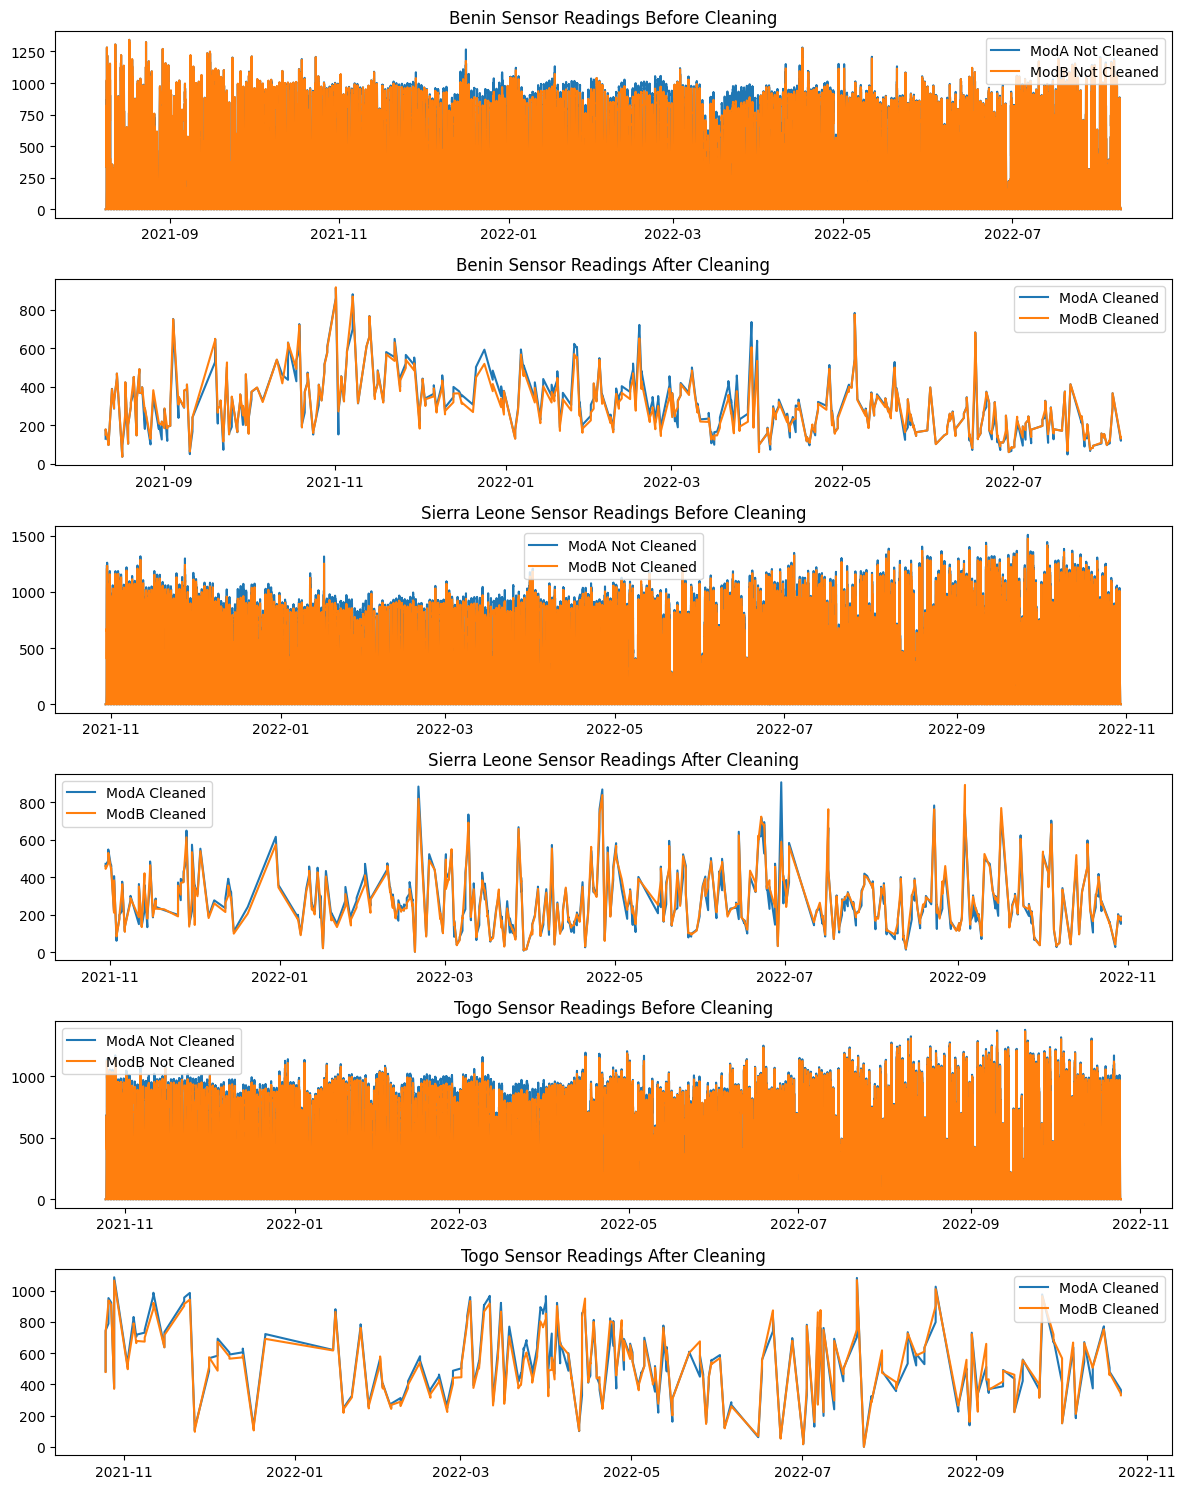

In [19]:
# Ensure the datetime column exists or create it
def ensure_datetime_column(df, name):
    if 'datetime' not in df.columns:
        print(f"'datetime' column missing in {name}. Attempting to create...")
        if 'date' in df.columns and 'time' in df.columns:
            df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
            print(f"'datetime' column created in {name}.")
        else:
            print(f"'datetime' column could not be created in {name}. Using index instead.")
            df['datetime'] = df.index  # Use index as a fallback

# Apply the function to each dataset
ensure_datetime_column(data, "data")
ensure_datetime_column(data2, "data2")
ensure_datetime_column(data3, "data3")

# Filter cleaned and not cleaned datasets
cleaned_benin = data[data['Cleaning'] == 1]
not_cleaned_benin = data[data["Cleaning"] == 0]

cleaned_togo = data3[data3['Cleaning'] == 1]
not_cleaned_togo = data3[data3["Cleaning"] == 0]

cleaned_sierra = data2[data2['Cleaning'] == 1]
not_cleaned_sierra = data2[data2["Cleaning"] == 0]

# Create subplots for the data
fig, ax = plt.subplots(6, 1, figsize=(12, 15))

# Benin: Before cleaning
ax[0].plot(not_cleaned_benin['datetime'], not_cleaned_benin['ModA'], label='ModA Not Cleaned')
ax[0].plot(not_cleaned_benin['datetime'], not_cleaned_benin['ModB'], label='ModB Not Cleaned')
ax[0].set_title('Benin Sensor Readings Before Cleaning')
ax[0].legend()

# Benin: After cleaning
ax[1].plot(cleaned_benin['datetime'], cleaned_benin['ModA'], label='ModA Cleaned')
ax[1].plot(cleaned_benin['datetime'], cleaned_benin['ModB'], label='ModB Cleaned')
ax[1].set_title('Benin Sensor Readings After Cleaning')
ax[1].legend()

# Sierra Leone: Before cleaning
ax[2].plot(not_cleaned_sierra['datetime'], not_cleaned_sierra['ModA'], label='ModA Not Cleaned')
ax[2].plot(not_cleaned_sierra['datetime'], not_cleaned_sierra['ModB'], label='ModB Not Cleaned')
ax[2].set_title('Sierra Leone Sensor Readings Before Cleaning')
ax[2].legend()

# Sierra Leone: After cleaning
ax[3].plot(cleaned_sierra['datetime'], cleaned_sierra['ModA'], label='ModA Cleaned')
ax[3].plot(cleaned_sierra['datetime'], cleaned_sierra['ModB'], label='ModB Cleaned')
ax[3].set_title('Sierra Leone Sensor Readings After Cleaning')
ax[3].legend()

# Togo: Before cleaning
ax[4].plot(not_cleaned_togo['datetime'], not_cleaned_togo['ModA'], label='ModA Not Cleaned')
ax[4].plot(not_cleaned_togo['datetime'], not_cleaned_togo['ModB'], label='ModB Not Cleaned')
ax[4].set_title('Togo Sensor Readings Before Cleaning')
ax[4].legend()

# Togo: After cleaning
ax[5].plot(cleaned_togo['datetime'], cleaned_togo['ModA'], label='ModA Cleaned')
ax[5].plot(cleaned_togo['datetime'], cleaned_togo['ModB'], label='ModB Cleaned')
ax[5].set_title('Togo Sensor Readings After Cleaning')
ax[5].legend()

# Adjust layout
plt.tight_layout()
plt.show()



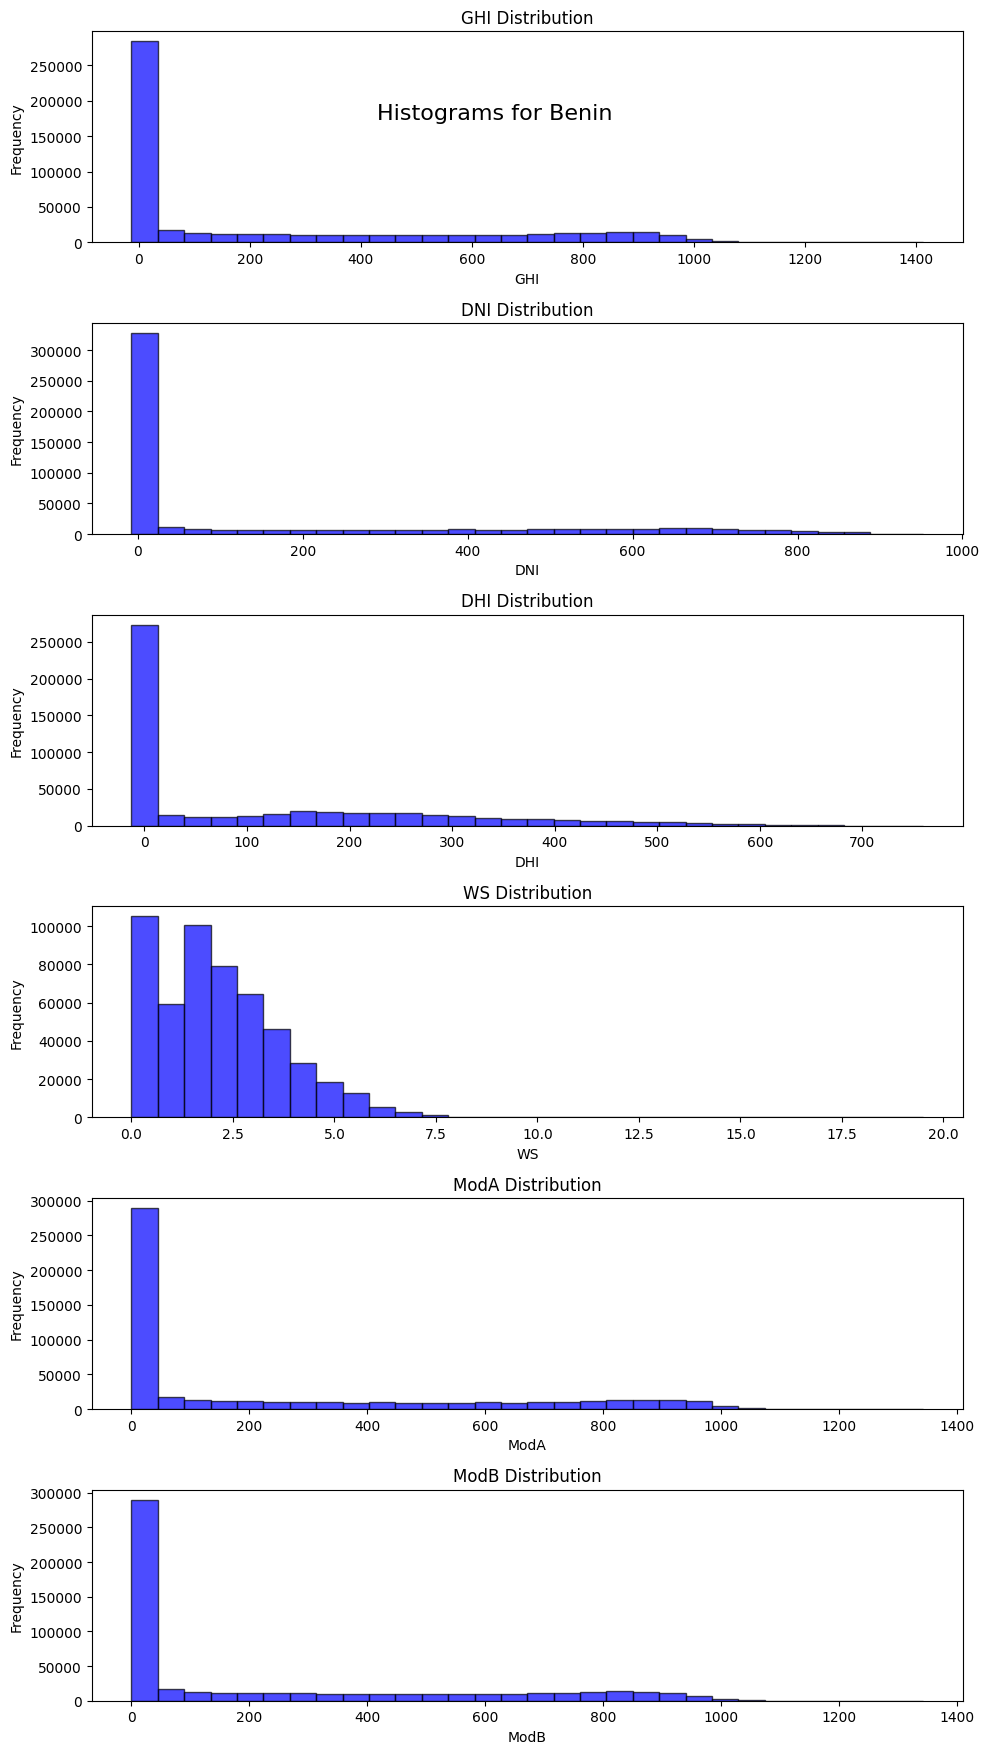

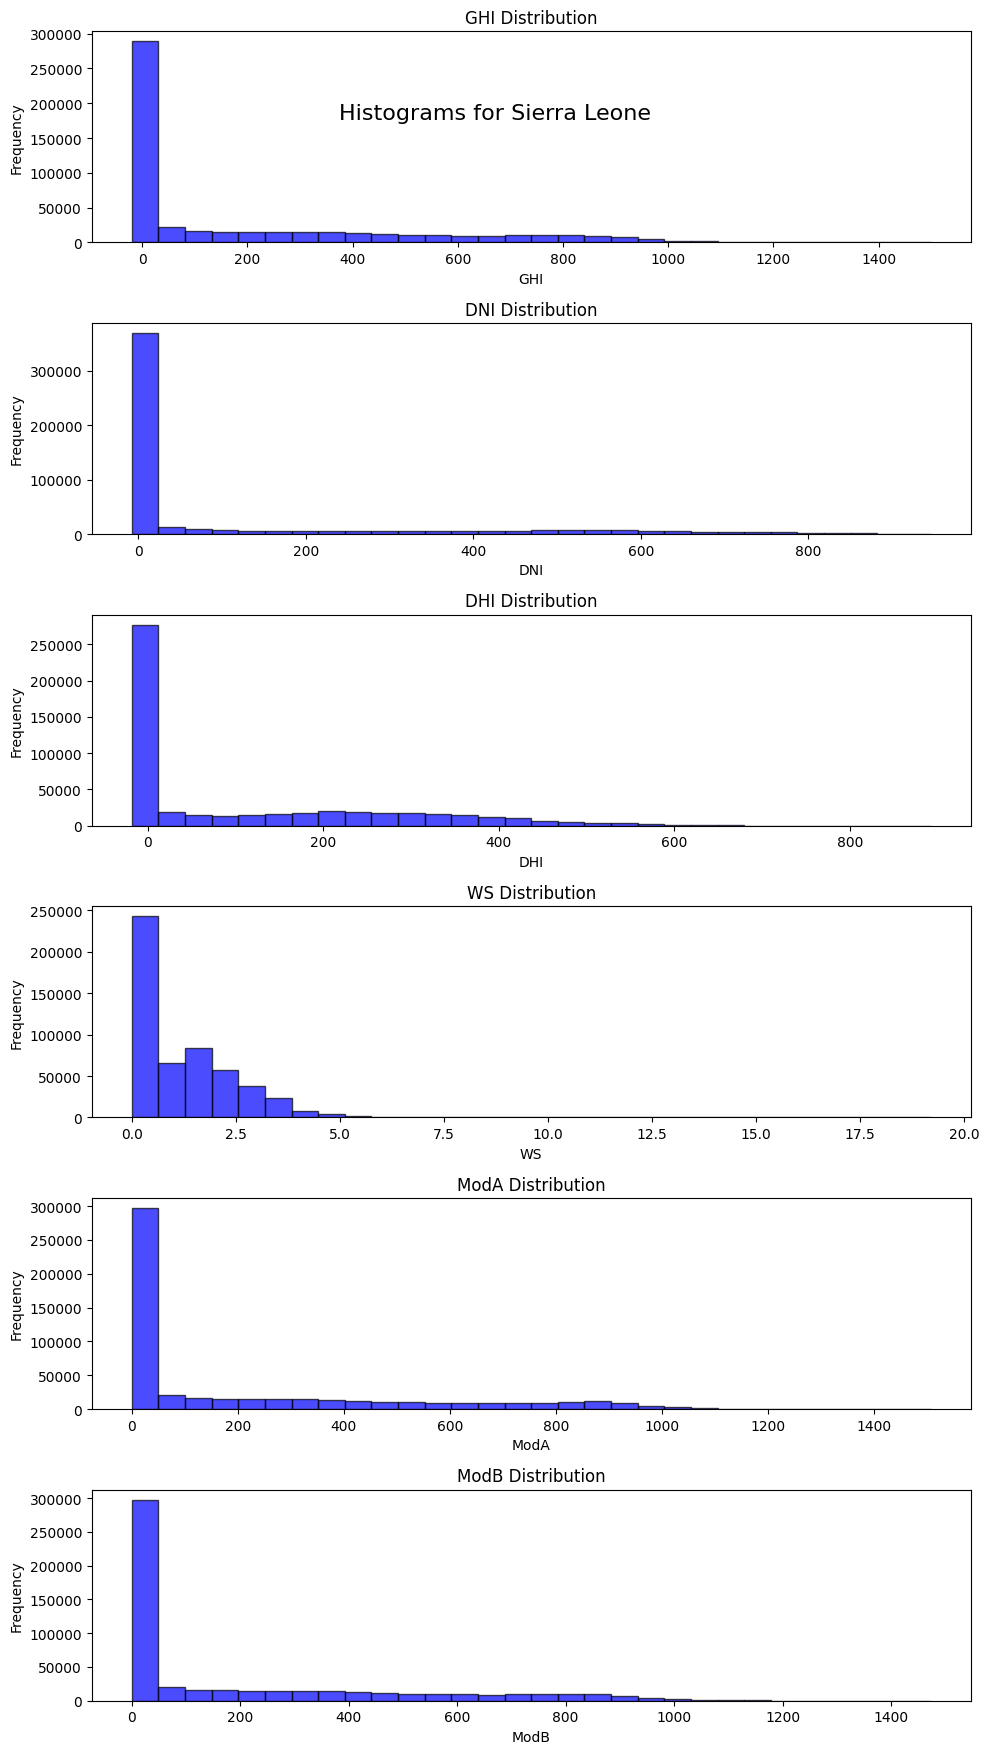

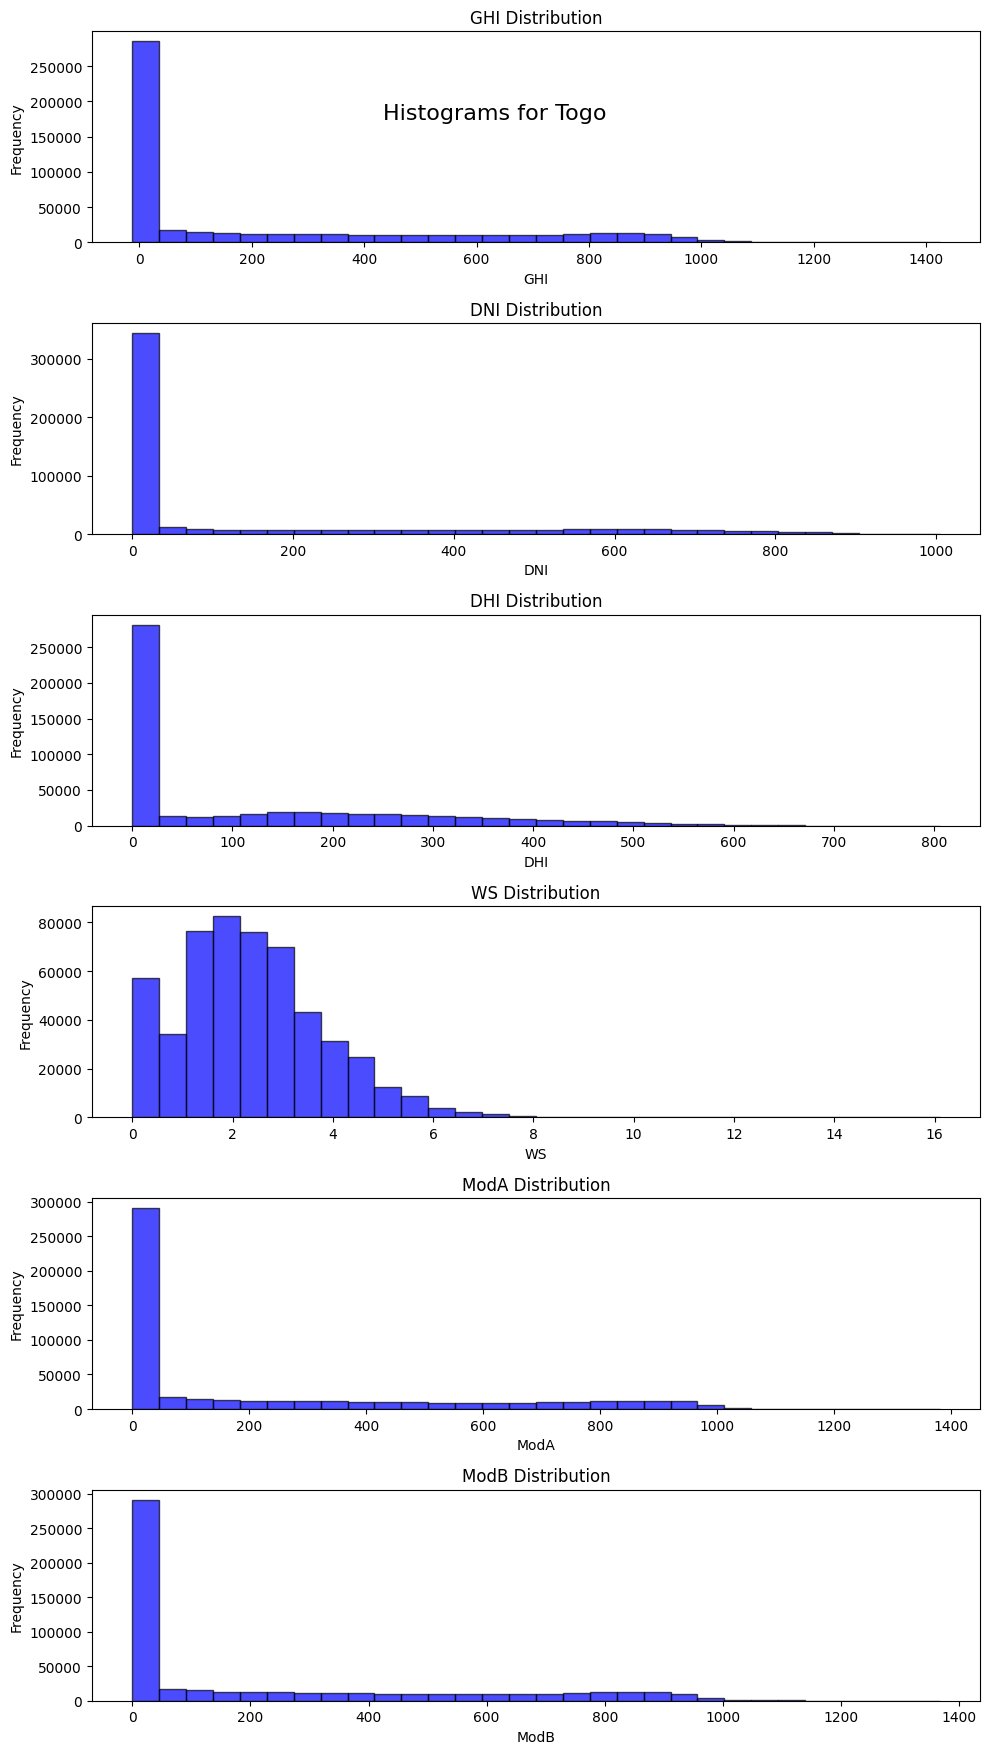

In [20]:
def create_histograms(df, variables, dataset_name):
    """
    Create histograms for specified variables in the dataset.

    Args:
    - df: Pandas DataFrame containing the dataset.
    - variables: List of variable names to create histograms for.
    - dataset_name: Name of the dataset (for titles).
    """
    num_vars = len(variables)
    fig, ax = plt.subplots(nrows=num_vars, ncols=1, figsize=(10, num_vars * 3))
    fig.suptitle(f'Histograms for {dataset_name}', fontsize=16, y=0.92)

    for i, var in enumerate(variables):
        ax[i].hist(df[var].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
        ax[i].set_title(f'{var} Distribution')
        ax[i].set_xlabel(var)
        ax[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Specify variables for histograms
variables = ['GHI', 'DNI', 'DHI', 'WS', 'ModA', 'ModB']

# Create histograms for each dataset
create_histograms(data, variables, "Benin")
create_histograms(data2, variables, "Sierra Leone")
create_histograms(data3, variables, "Togo")


In [21]:
def z_score_analysis(df, variables, threshold=3):
    z_scores = df[variables].apply(zscore, nan_policy='omit')  # Calculate Z-scores
    outliers = (abs(z_scores) > threshold)  # Flag outliers based on threshold

    flagged_data = df.copy()
    flagged_data['Outlier'] = outliers.any(axis=1)  # Mark rows with any outlier
    return flagged_data, z_scores

# Perform Z-Score analysis for specified variables
variables = ['GHI', 'DNI', 'DHI', 'WS', 'ModA', 'ModB']
flagged_data, z_scores = z_score_analysis(data, variables)

# Display flagged data
print(flagged_data[flagged_data['Outlier']])


                        GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  30.3  68.2  3.2   
2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  30.4  68.4  3.4   
2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  30.6  68.2  4.7   
2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   
...                     ...    ...    ...     ...     ...   ...   ...  ...   
2022-08-08 15:46:00     8.7   -0.2    8.6     9.0     8.8  21.7  98.7  7.0   
2022-08-08 15:48:00     8.4   -0.1    8.3     8.8     8.6  21.7  98.7  7.0   
2022-08-08 16:00:00     7.9    0.0    7.8     8.3     8.2  21.9  99.0  7.4   
2022-08-08 16:22:00     4.6   -0.1    4.6     6.1     5.9  21.9  99.0  7.1   
2022-08-08 16:32:00     4.7   -0.1    4.8     6.0     5.9  22.0 

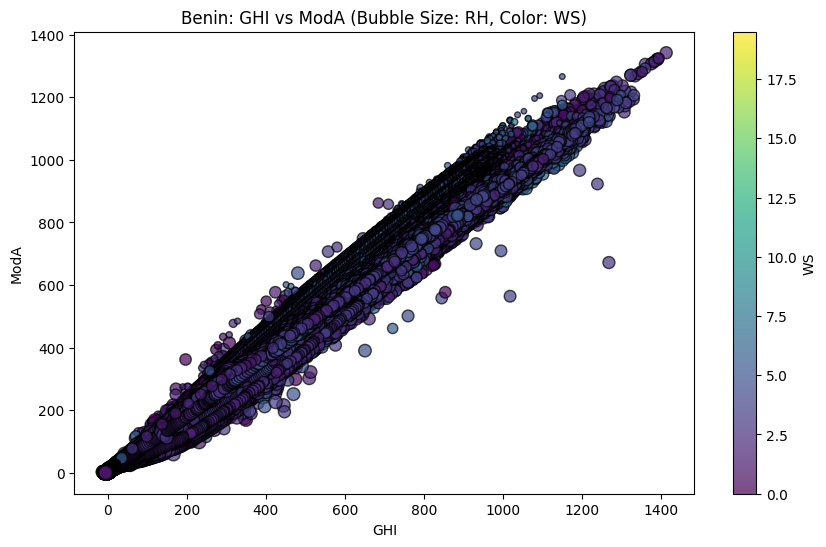

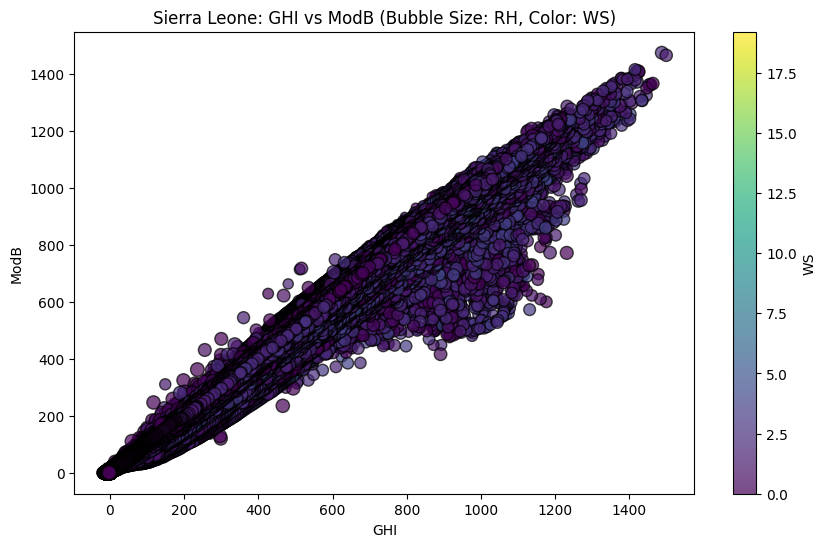

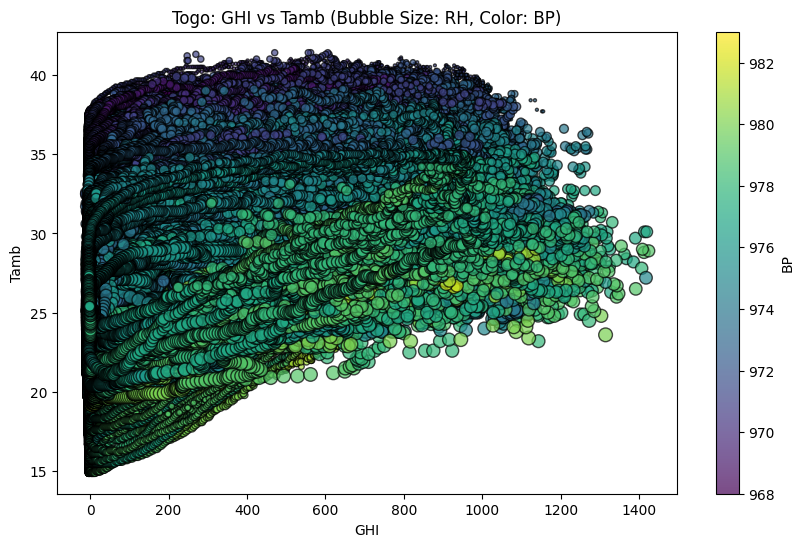

In [26]:
def create_bubble_chart(df, x, y, size, color, dataset_name):

    plt.figure(figsize=(10, 6))
    bubble_sizes = df[size] / df[size].max() * 100  # Normalize bubble sizes

    plt.scatter(df[x], df[y], s=bubble_sizes, c=df[color], cmap='viridis', alpha=0.7, edgecolor='k')
    plt.colorbar(label=color)
    plt.title(f'{dataset_name}: {x} vs {y} (Bubble Size: {size}, Color: {color})')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Create bubble charts for each dataset
create_bubble_chart(data, 'GHI', 'ModA', 'RH', 'WS', "Benin")
create_bubble_chart(data2, 'GHI', 'ModB', 'RH', 'WS', "Sierra Leone")
create_bubble_chart(data3, 'GHI', 'Tamb', 'RH', 'BP', "Togo")


In [31]:
def clean_data(df):
    # Convert datetime column to correct type
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

    # Define numerical columns
    numerical_columns = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'TModA', 'TModB', 'RH', 'BP']
    numerical_columns = [col for col in numerical_columns if col in df.columns]  # Ensure columns exist

    # Handle missing values for numerical columns
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].median())  # Fill NaN with column median

    # Handle missing values in non-numerical columns
    if 'Comments' in df.columns and df['Comments'].isnull().all():
        df = df.drop(columns=['Comments'])

    # Remove rows with negative values in specific columns
    for col in numerical_columns:
        if col in ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'ModA', 'ModB']:
            df[col] = df[col].where(df[col] >= 0, np.nan)

    # Calculate Z-scores to detect outliers
    z_scores = np.abs(stats.zscore(df[numerical_columns].fillna(df[numerical_columns].median())))  # Handle NaNs
    outlier_threshold = 3  # Define threshold for outliers

    # Create a DataFrame for Z-scores with matching index
    z_score_df = pd.DataFrame(z_scores, index=df.index, columns=numerical_columns)

    # Filter rows that do not exceed the outlier threshold
    df = df[(z_score_df < outlier_threshold).all(axis=1)]

    # Optionally, drop remaining NaN rows for numerical columns
    df = df.dropna(subset=numerical_columns, how='any')

    return df

# Apply the cleaning function to each dataset
cleaned_data_benin = clean_data(data)
cleaned_data_togo = clean_data(data3)
cleaned_data_sierra = clean_data(data2)

# Check summary after cleaning
print("Cleaned Benin Data Info:")
print(cleaned_data_benin.info())
print("\nCleaned Togo Data Info:")
print(cleaned_data_togo.info())
print("\nCleaned Sierra Leone Data Info:")
print(cleaned_data_sierra.info())


Cleaned Benin Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235246 entries, 2021-08-09 06:54:00 to 2022-08-08 16:51:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   GHI            235246 non-null  float64       
 1   DNI            235246 non-null  float64       
 2   DHI            235246 non-null  float64       
 3   ModA           235246 non-null  float64       
 4   ModB           235246 non-null  float64       
 5   Tamb           235246 non-null  float64       
 6   RH             235246 non-null  float64       
 7   WS             235246 non-null  float64       
 8   WSgust         235246 non-null  float64       
 9   WSstdev        235246 non-null  float64       
 10  WD             235246 non-null  float64       
 11  WDstdev        235246 non-null  float64       
 12  BP             235246 non-null  int64         
 13  Cleaning       235246 non-null  int64        